In [ ]:
# TALLER DE MACHINE LEARNING NO SUPERVISADO - DATASET DE SETAS
# ====================================================================
# PARTE 1: CARGA Y EXPLORACIÓN DE DATOS


In [20]:
# ============================================================================
# 📦 IMPORTACIÓN DE LIBRERÍAS
# ============================================================================
# Estas son las herramientas que vamos a usar para trabajar con los datos

# Para manipulación de datos (como Excel pero más poderoso)
import pandas as pd
import numpy as np

# Para crear gráficos y visualizaciones bonitas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Para ignorar advertencias molestas que no afectan nuestro código
import warnings
warnings.filterwarnings('ignore')

# Configuración para que los gráficos se vean mejor
plt.style.use('seaborn-v0_8-darkgrid')  # Estilo de los gráficos
sns.set_palette("husl")  # Colores bonitos
plt.rcParams['figure.figsize'] = (12, 6)  # Tamaño por defecto de gráficos

print("✅ Librerías importadas correctamente")
print("="*70)

✅ Librerías importadas correctamente


In [21]:

# ============================================================================
# 📥 CARGA DEL DATASET
# ============================================================================
"""
¿Qué es un dataset?
Es como una tabla de Excel con información. En este caso, cada fila es un
hongo diferente y cada columna es una característica (color, forma, olor, etc.)
"""

# Cargamos los datos desde un archivo CSV (Comma Separated Values)
# CSV es como un archivo de texto donde los datos están separados por comas
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"

# Los nombres de las columnas no vienen en el archivo, así que los definimos
columnas = [
    'class',           # Clase: e=comestible, p=venenoso (TARGET)
    'cap-shape',       # Forma del sombrero
    'cap-surface',     # Superficie del sombrero
    'cap-color',       # Color del sombrero
    'bruises',         # ¿Tiene moretones/manchas?
    'odor',            # Olor del hongo
    'gill-attachment', # Tipo de unión de las láminas
    'gill-spacing',    # Espaciado de las láminas
    'gill-size',       # Tamaño de las láminas
    'gill-color',      # Color de las láminas
    'stalk-shape',     # Forma del tallo
    'stalk-root',      # Tipo de raíz del tallo
    'stalk-surface-above-ring',  # Superficie del tallo sobre el anillo
    'stalk-surface-below-ring',  # Superficie del tallo bajo el anillo
    'stalk-color-above-ring',    # Color del tallo sobre el anillo
    'stalk-color-below-ring',    # Color del tallo bajo el anillo
    'veil-type',       # Tipo de velo
    'veil-color',      # Color del velo
    'ring-number',     # Número de anillos
    'ring-type',       # Tipo de anillo
    'spore-print-color',  # Color de impresión de esporas
    'population',      # Tamaño de población
    'habitat'          # Hábitat donde crece
]

# Intentamos cargar el dataset
try:
    # header=None significa que no hay encabezados en el archivo
    # names=columnas asigna los nombres que definimos arriba
    df = pd.read_csv(url, header=None, names=columnas)
    print("✅ Dataset cargado exitosamente desde UCI Repository")
    print(f"📊 Dimensiones del dataset: {df.shape[0]} filas x {df.shape[1]} columnas")
except Exception as e:
    print(f"❌ Error al cargar el dataset: {e}")
    print("💡 Intenta descargarlo manualmente desde:")
    print("   https://archive.ics.uci.edu/dataset/73/mushroom")

print("="*70)


✅ Dataset cargado exitosamente desde UCI Repository
📊 Dimensiones del dataset: 8124 filas x 23 columnas


In [22]:
# ============================================================================
# 👀 VISUALIZACIÓN GENERAL DEL DATASET
# ============================================================================
"""
Ahora vamos a explorar cómo se ven nuestros datos. Es como abrir el archivo
de Excel por primera vez para ver qué hay dentro.
"""

print("\n📋 PRIMERAS 10 FILAS DEL DATASET:")
print("="*70)
# .head(10) muestra las primeras 10 filas
print(df.head(10))

print("\n\n📋 ÚLTIMAS 5 FILAS DEL DATASET:")
print("="*70)
# .tail(5) muestra las últimas 5 filas
print(df.tail(5))

print("\n\n📊 INFORMACIÓN GENERAL DEL DATASET:")
print("="*70)
# .info() da un resumen: tipo de datos, valores no nulos, memoria usada
df.info()

print("\n\n📈 ESTADÍSTICAS DESCRIPTIVAS:")
print("="*70)
# .describe() muestra estadísticas básicas de las columnas
# include='all' incluye tanto columnas numéricas como categóricas
print(df.describe(include='all'))



📋 PRIMERAS 10 FILAS DEL DATASET:
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   
5     e         x           y         y       t    a               f   
6     e         b           s         w       t    a               f   
7     e         b           y         w       t    l               f   
8     p         x           y         w       t    p               f   
9     e         b           s         y       t    a               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k



🎯 DISTRIBUCIÓN DE LA VARIABLE OBJETIVO:
class
e    4208
p    3916
Name: count, dtype: int64

Porcentajes:
Comestibles (e): 51.80%
Venenosos (p): 48.20%


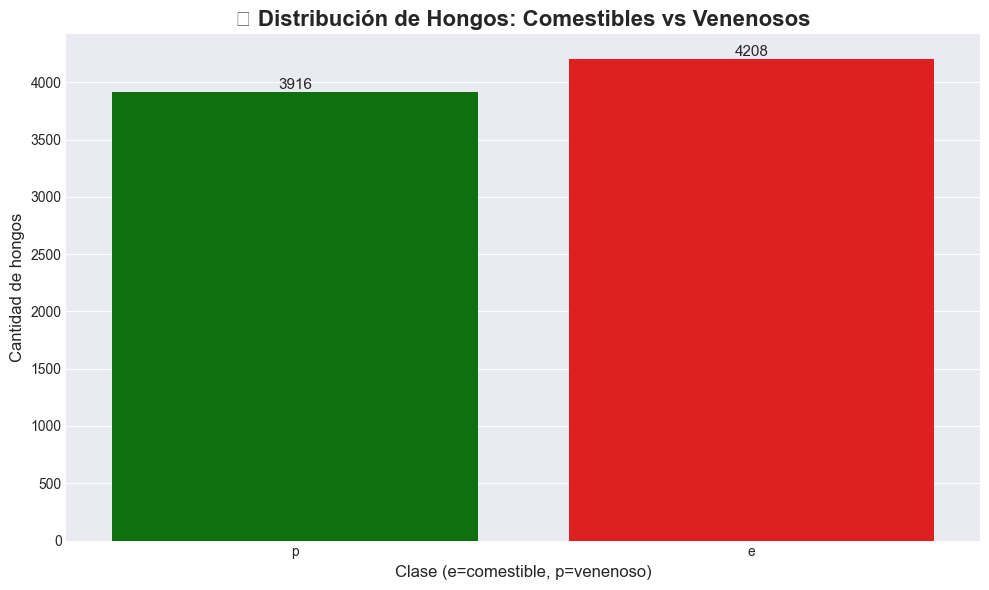

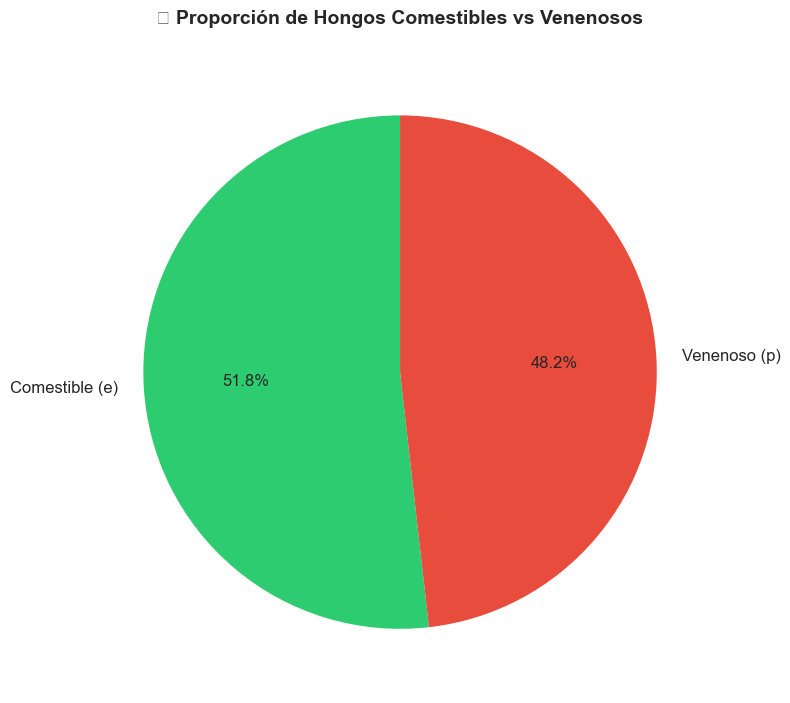

In [23]:
# ============================================================================
# 🔍 ANÁLISIS DE LA VARIABLE OBJETIVO (CLASS)
# ============================================================================
"""
La variable 'class' es lo que queremos predecir:
- 'e' = edible (comestible) ✅
- 'p' = poisonous (venenoso) ☠️
"""

print("\n\n🎯 DISTRIBUCIÓN DE LA VARIABLE OBJETIVO:")
print("="*70)

# Contamos cuántos hongos hay de cada clase
conteo_clases = df['class'].value_counts()
print(conteo_clases)

# Calculamos el porcentaje
porcentaje_clases = df['class'].value_counts(normalize=True) * 100
print(f"\nPorcentajes:")
print(f"Comestibles (e): {porcentaje_clases['e']:.2f}%")
print(f"Venenosos (p): {porcentaje_clases['p']:.2f}%")

# Visualización 1: Gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='class', palette=['green', 'red'])
plt.title('🍄 Distribución de Hongos: Comestibles vs Venenosos', 
          fontsize=16, fontweight='bold')
plt.xlabel('Clase (e=comestible, p=venenoso)', fontsize=12)
plt.ylabel('Cantidad de hongos', fontsize=12)

# Añadimos etiquetas con los números en cada barra
for container in ax.containers:
    ax.bar_label(container, fontsize=11)

plt.tight_layout()
plt.show()

# Visualización 2: Gráfico de pastel con Matplotlib
fig, ax = plt.subplots(figsize=(8, 8))
colores = ['#2ecc71', '#e74c3c']  # Verde para comestible, rojo para venenoso
etiquetas = ['Comestible (e)', 'Venenoso (p)']
ax.pie(conteo_clases, labels=etiquetas, autopct='%1.1f%%', 
       colors=colores, startangle=90, textprops={'fontsize': 12})
ax.set_title('🍄 Proporción de Hongos Comestibles vs Venenosos', 
             fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Visualización 3: Gráfico interactivo con Plotly
fig_plotly = px.pie(
    values=conteo_clases.values,
    names=['Comestible', 'Venenoso'],
    title='Distribución Interactiva de Clases de Hongos',
    color_discrete_sequence=['green', 'red'],
    hole=0.3  # Hace un gráfico de dona
)
fig_plotly.update_traces(textposition='inside', textinfo='percent+label')
fig_plotly.show()




❓ ANÁLISIS DE VALORES NULOS:
Valores nulos por columna:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Porcentaje de valores nulos por columna:
class                       0.0
cap-shape                   0.0
cap-surface                 0.0
cap-color                   0.0
bruises                     0.0
odor                        0.0
gill-

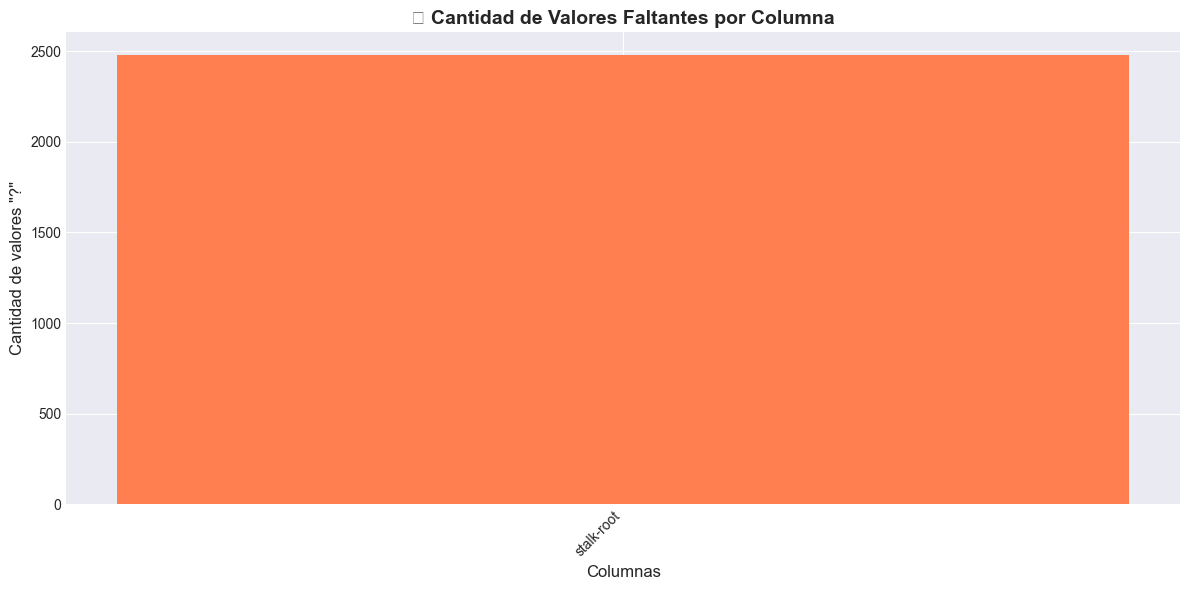

In [24]:
# ============================================================================
# 🔍 CONTEO DE VALORES NULOS (MISSING VALUES)
# ============================================================================
"""
Los valores nulos son datos faltantes, como celdas vacías en Excel.
Es importante detectarlos porque pueden afectar nuestros modelos.
"""

print("\n\n❓ ANÁLISIS DE VALORES NULOS:")
print("="*70)

# Contamos cuántos valores nulos hay en cada columna
valores_nulos = df.isnull().sum()
print("Valores nulos por columna:")
print(valores_nulos)

# Calculamos el porcentaje de valores nulos
porcentaje_nulos = (df.isnull().sum() / len(df)) * 100
print("\nPorcentaje de valores nulos por columna:")
print(porcentaje_nulos)

# En este dataset, los valores faltantes están codificados como '?'
# Vamos a contarlos
print("\n\n🔍 BÚSQUEDA DE VALORES '?' (VALORES FALTANTES):")
print("="*70)

valores_interrogacion = (df == '?').sum()
print("Columnas con valores '?':")
print(valores_interrogacion[valores_interrogacion > 0])

# Porcentaje de '?' por columna
porcentaje_interrogacion = (valores_interrogacion / len(df)) * 100
print("\nPorcentaje de valores '?' por columna:")
print(porcentaje_interrogacion[porcentaje_interrogacion > 0])

# Visualización de valores faltantes
if valores_interrogacion.sum() > 0:
    plt.figure(figsize=(12, 6))
    columnas_con_faltantes = valores_interrogacion[valores_interrogacion > 0]
    plt.bar(columnas_con_faltantes.index, columnas_con_faltantes.values, color='coral')
    plt.title('📊 Cantidad de Valores Faltantes por Columna', 
              fontsize=14, fontweight='bold')
    plt.xlabel('Columnas', fontsize=12)
    plt.ylabel('Cantidad de valores "?"', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



🎨 VALORES ÚNICOS POR COLUMNA:
veil-type                    1
class                        2
gill-attachment              2
gill-spacing                 2
stalk-shape                  2
gill-size                    2
bruises                      2
ring-number                  3
stalk-surface-above-ring     4
veil-color                   4
cap-surface                  4
stalk-surface-below-ring     4
ring-type                    5
stalk-root                   5
cap-shape                    6
population                   6
habitat                      7
odor                         9
stalk-color-above-ring       9
stalk-color-below-ring       9
spore-print-color            9
cap-color                   10
gill-color                  12
dtype: int64


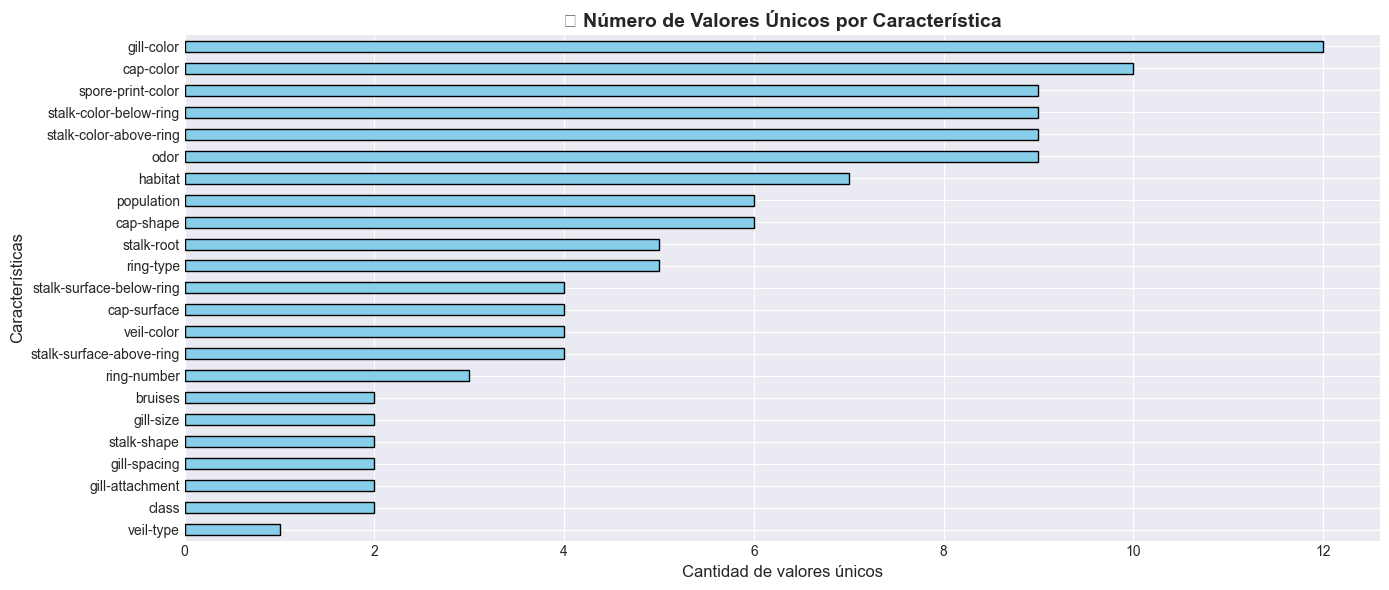



📋 VALORES ÚNICOS DETALLADOS:

class:
  Cantidad: 2
  Valores: ['p' 'e']

cap-shape:
  Cantidad: 6
  Valores: ['x' 'b' 's' 'f' 'k' 'c']

cap-surface:
  Cantidad: 4
  Valores: ['s' 'y' 'f' 'g']

cap-color:
  Cantidad: 10
  Valores: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']

bruises:
  Cantidad: 2
  Valores: ['t' 'f']

odor:
  Cantidad: 9
  Valores: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']

gill-attachment:
  Cantidad: 2
  Valores: ['f' 'a']

gill-spacing:
  Cantidad: 2
  Valores: ['c' 'w']

gill-size:
  Cantidad: 2
  Valores: ['n' 'b']

gill-color:
  Cantidad: 12
  Valores: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']

stalk-shape:
  Cantidad: 2
  Valores: ['e' 't']

stalk-root:
  Cantidad: 5
  Valores: ['e' 'c' 'b' 'r' '?']

stalk-surface-above-ring:
  Cantidad: 4
  Valores: ['s' 'f' 'k' 'y']

stalk-surface-below-ring:
  Cantidad: 4
  Valores: ['s' 'f' 'y' 'k']

stalk-color-above-ring:
  Cantidad: 9
  Valores: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']

stalk-color-below-ring:
  Cantidad

In [25]:
# ============================================================================
# 🔢 CONTEO DE VALORES ÚNICOS POR VARIABLE
# ============================================================================
"""
Los valores únicos nos dicen cuántas categorías diferentes tiene cada variable.
Por ejemplo: ¿cuántos colores diferentes de sombrero existen?
"""

print("\n\n🎨 VALORES ÚNICOS POR COLUMNA:")
print("="*70)

valores_unicos = df.nunique().sort_values()
print(valores_unicos)

# Visualización de valores únicos
plt.figure(figsize=(14, 6))
valores_unicos.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('📊 Número de Valores Únicos por Característica', 
          fontsize=14, fontweight='bold')
plt.xlabel('Cantidad de valores únicos', fontsize=12)
plt.ylabel('Características', fontsize=12)
plt.tight_layout()
plt.show()

# Mostramos los valores únicos de cada columna
print("\n\n📋 VALORES ÚNICOS DETALLADOS:")
print("="*70)
for columna in df.columns:
    valores = df[columna].unique()
    print(f"\n{columna}:")
    print(f"  Cantidad: {len(valores)}")
    print(f"  Valores: {valores}")

In [26]:
# ============================================================================
# 🗑️ ELIMINACIÓN DE COLUMNAS CONSTANTES O POCO INFORMATIVAS
# ============================================================================
"""
Las columnas constantes son aquellas que tienen el mismo valor en todas las filas.
No aportan información útil para nuestro modelo, por lo que las eliminamos.
"""

print("\n\n🗑️ IDENTIFICACIÓN DE COLUMNAS CONSTANTES:")
print("="*70)

# Buscamos columnas con solo 1 valor único
columnas_constantes = []
for columna in df.columns:
    if df[columna].nunique() == 1:
        columnas_constantes.append(columna)
        print(f"❌ {columna}: tiene solo 1 valor único → {df[columna].unique()}")

if len(columnas_constantes) > 0:
    print(f"\n🗑️ Se eliminarán {len(columnas_constantes)} columna(s) constante(s)")
    df = df.drop(columns=columnas_constantes)
    print(f"✅ Columnas eliminadas: {columnas_constantes}")
    print(f"📊 Nuevas dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")
else:
    print("✅ No se encontraron columnas constantes")

print("\n" + "="*70)
print("✅ PARTE 1 COMPLETADA: Carga y Exploración de Datos")
print("="*70)
print(f"\n📊 Dataset final para la siguiente etapa:")
print(f"   - Filas: {df.shape[0]}")
print(f"   - Columnas: {df.shape[1]}")
print(f"   - Memoria usada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n🎯 Próximo paso: PREPROCESAMIENTO DE DATOS")
print("="*70)



🗑️ IDENTIFICACIÓN DE COLUMNAS CONSTANTES:
❌ veil-type: tiene solo 1 valor único → ['p']

🗑️ Se eliminarán 1 columna(s) constante(s)
✅ Columnas eliminadas: ['veil-type']
📊 Nuevas dimensiones: 8124 filas x 22 columnas

✅ PARTE 1 COMPLETADA: Carga y Exploración de Datos

📊 Dataset final para la siguiente etapa:
   - Filas: 8124
   - Columnas: 22
   - Memoria usada: 8.52 MB

🎯 Próximo paso: PREPROCESAMIENTO DE DATOS
